#**Importe de Librerias y Condiciones Iniciales**

In [1]:
# @title
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# @title
gases = ["H_2", "N_2", "O_2"]
a = np.array([0.01945, 0.13882, 0.13983])
b = np.array([0.022, 0.039, 0.032])
R = 8.314

T =  np.linspace(273,373,5)
v1 = np.linspace(1,5,5)
v2 = np.linspace(10,20,5)

dU = np.zeros((3,5,5))
dA = np.zeros((3,5,5))
dH = np.zeros((3,5,5))
dG = np.zeros((3,5,5))



---



#**Energía Interna**

De las relaciones de Maxwell se mostró que

$$\left.\frac{\partial U}{\partial v}\right|_T=T\left.\frac{\partial P}{\partial T}\right|_v -P=\frac{a}{v^2}$$

Por lo anterior, el cambio en la energía interna resulta ser negativo y el gas perdió energía por la expansión.

$$dU=\frac{a}{v^2}dv\to \Delta U=2a\left(\frac{1}{v_1}-\frac{1}{v_2}\right)$$

In [3]:
# @title
def delta_U(v1, v2, a):
    return 2*a*(1/v1 - 1/v2)

In [40]:
# @title
for i in range(3):
  for j in range(5):
    dU[i,j] = delta_U(v1[j], v2, a[i])

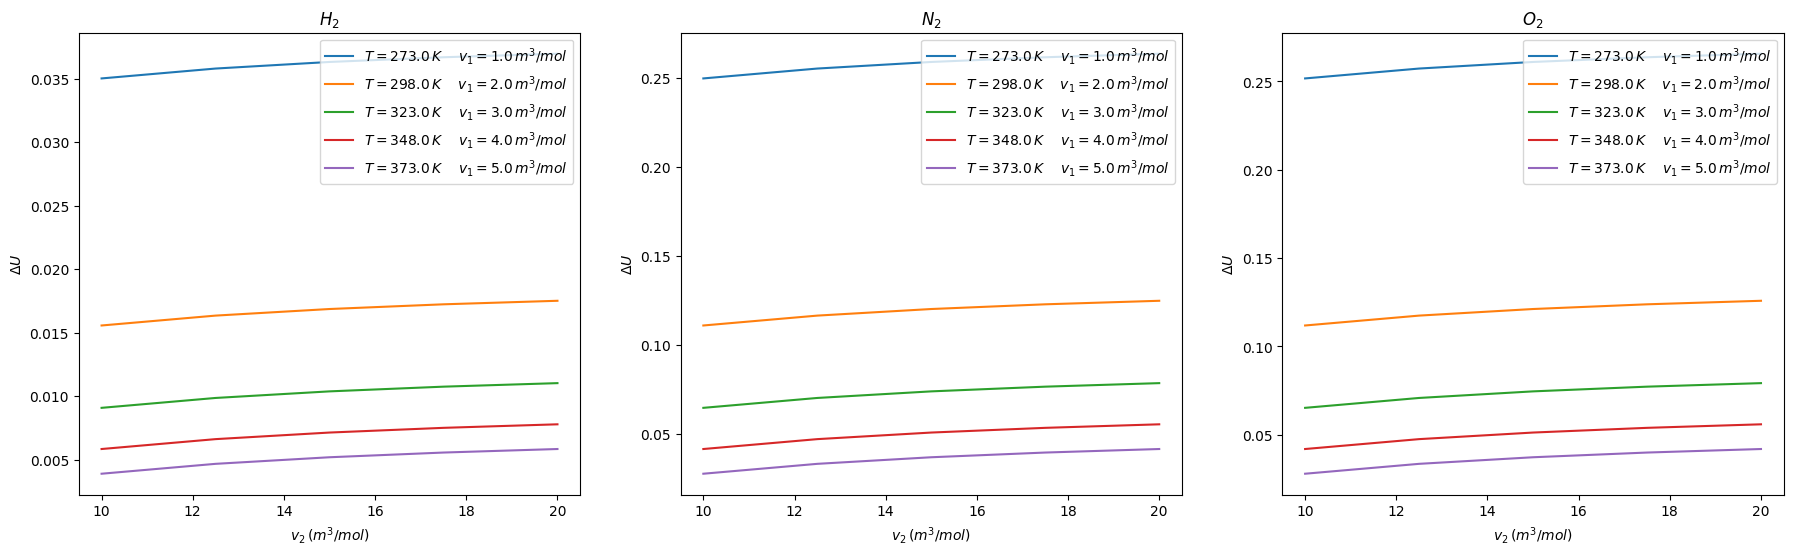

In [51]:
# @title
plt.figure(figsize = (22,6))

for i in range(3):
  plt.subplot(1,3,i+1)
  for j in range(5):
    plt.plot(v2, dU[i,j], label = f'$T={T[j]}\,K$\t$v_1={v1[j]}\,m^3/mol$')
  plt.legend(loc = 'upper right')
  plt.xlabel('$v_2\,(m^3/mol)$')
  plt.title(f'${gases[i]}$')
  plt.ylabel('$\\Delta U$')



---



#**Energía Libre de Helmholtz**

Debido al proceso isotérmico, $dT=0$

$$dA=-Pdv=\frac{a}{v^2}dv-\frac{RT}{v-b}dv$$

$$\Delta A = RT\ln{\left(\frac{v_1 -b}{v_2-b}\right)}+2a\left(\frac{1}{v_2}-\frac{1}{v_1}\right)$$

In [52]:
# @title
def delta_A(v1, v2, a, b, T):
    return R*T*np.log((v1 - b)/(v2 - b)) + 2*a*(1/v2 - 1/v1)

In [53]:
# @title
for i in range(3):
  for j in range(5):
    dA[i,j] = delta_A(v1[j], v2, a[i], b[i], T[j])

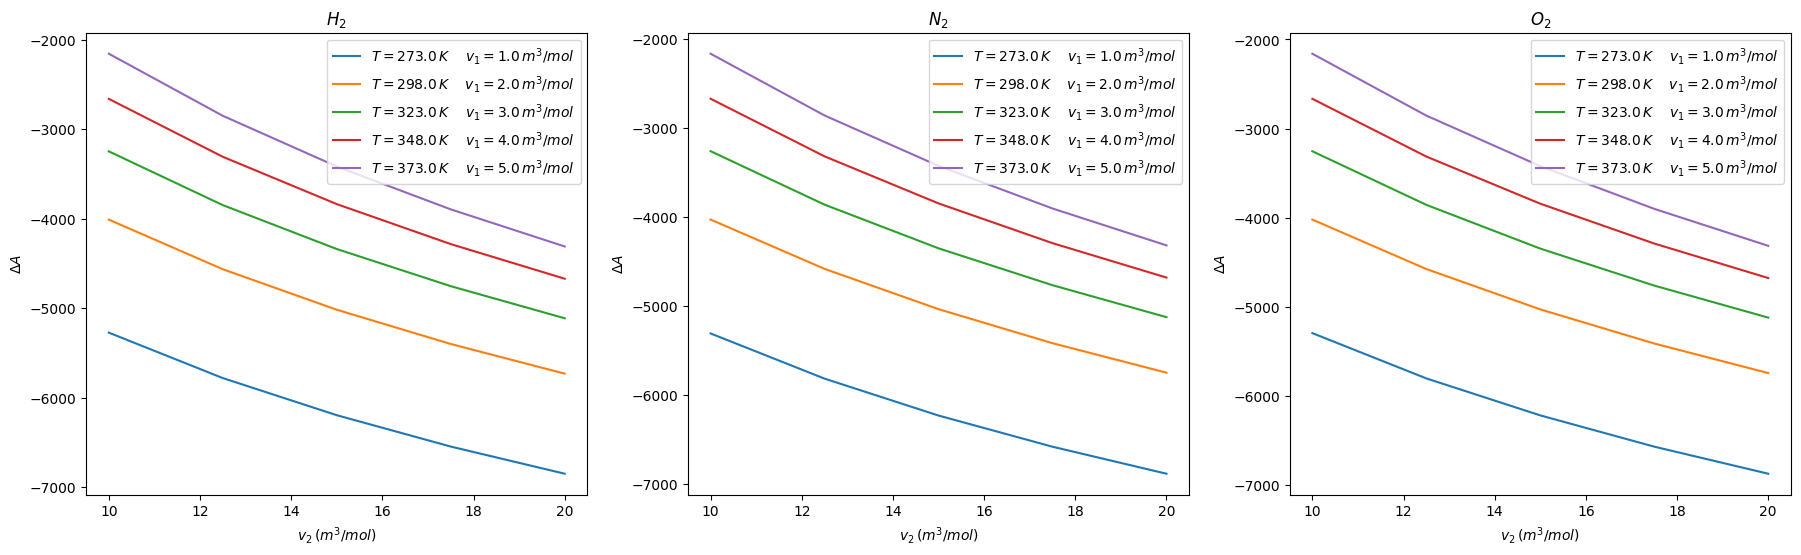

In [54]:
# @title
plt.figure(figsize = (22,6))

for i in range(3):
  plt.subplot(1,3,i+1)
  for j in range(5):
    plt.plot(v2, dA[i,j], label = f'$T={T[j]}\,K$\t$v_1={v1[j]}\,m^3/mol$')
  plt.legend(loc = 'upper right')
  plt.xlabel('$v_2\,(m^3/mol)$')
  plt.title(f'${gases[i]}$')
  plt.ylabel('$\\Delta A$')



---



#**Entalpía**

Realizando la derivada respecto a $v$ sobre la función de entalpía, $H$:

$$\left. \frac{\partial H}{\partial v}\right|_T=T\left.\frac{\partial S}{\partial v}\right|_T + v\left.\frac{\partial P}{\partial v}\right|_T$$

De las relaciones de Maxwell se tiene que

$$\left.\frac{\partial S}{\partial v}\right|_T=\left.\frac{\partial P}{\partial T}\right|_v$$

Luego del desarrollo algebraico se llega a que

$$dH=\left(\frac{RT}{v-b}-\frac{vRT}{(v-b)^2}+\frac{2a}{v^2}\right)dv$$

$$\Delta H= RTb\left(\frac{1}{v_2-b}-\frac{1}{v_1-b}\right)-2a\left(\frac{1}{v_2}-\frac{1}{v_1}\right)$$

In [12]:
# @title
def delta_H(v1, v2, a, b, T):
    return R*T*b*(1/(v2 - b) - 1/(v1 - b)) - 2*a*(1/v2 - 1/v1)

In [43]:
# @title
for i in range(3):
  for j in range(5):
    dH[i,j] = delta_H(v1[j], v2, a[i], b[i], T[j])

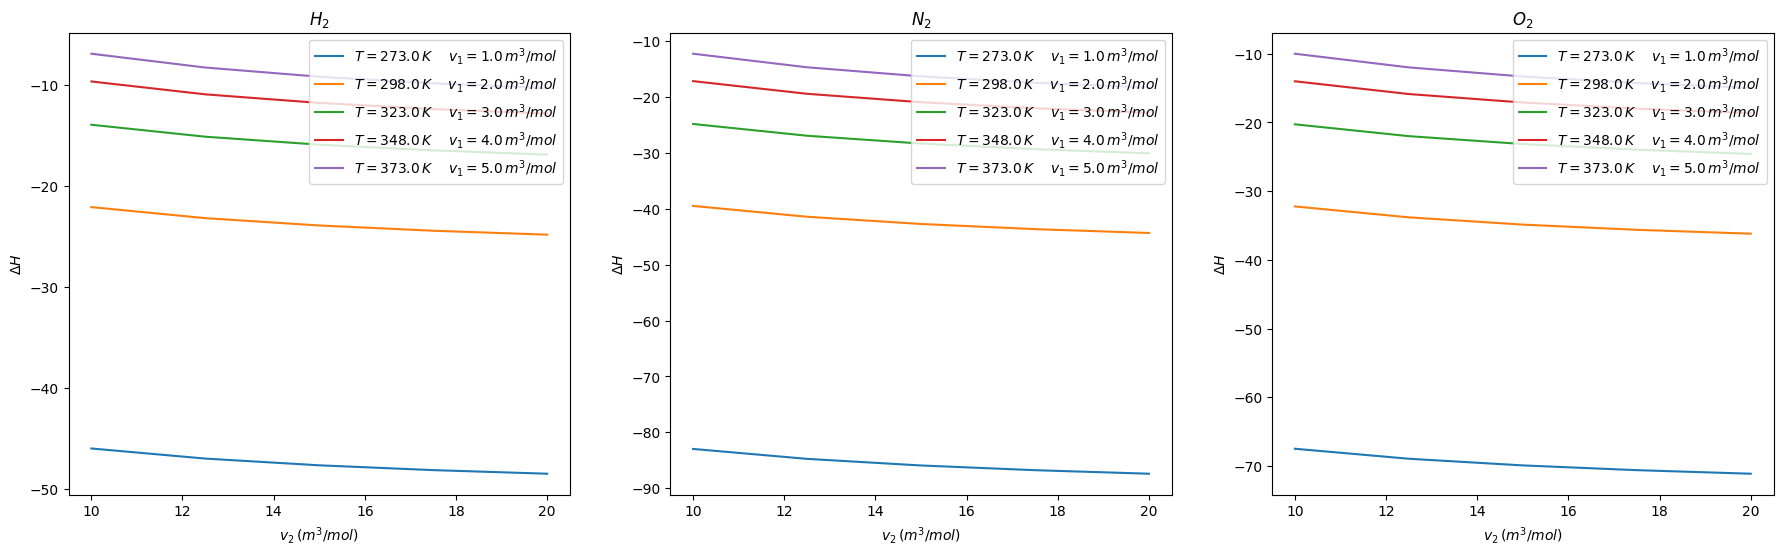

In [49]:
# @title
plt.figure(figsize = (22,6))

for i in range(3):
  plt.subplot(1,3,i+1)
  for j in range(5):
    plt.plot(v2, dH[i,j], label = f'$T={T[j]}\,K$\t$v_1={v1[j]}\,m^3/mol$')
  plt.legend(loc = 'upper right')
  plt.xlabel('$v_2\,(m^3/mol)$')
  plt.title(f'${gases[i]}$')
  plt.ylabel('$\\Delta H$')



---



#**Energía Libre de Gibbs**

Se sigue el proceso anterior de forma similar. Se considera el proceso isotérmico, $dT=0$

$$dG=vdP$$

$$\left.\frac{\partial G}{\partial v}\right|_T=v\left.\frac{\partial P}{\partial v}\right|_T=\frac{2a}{v^2}-\frac{vRT}{(v-b)^2}$$

$$\Delta G= RTb\left(\frac{1}{v_2-b}-\frac{1}{v_1-b}\right)-2a\left(\frac{1}{v_2}-\frac{1}{v_1}\right)-RT\ln{\left(\frac{v_2 -b}{v_1-b}\right)}$$

In [15]:
# @title
def delta_G(v1, v2, a, b, T):

    term1 = R*T*b*(1/(v2 - b) - 1/(v1 - b))
    term2 = 2*a*(1/v2 - 1/v1)
    term3 = R*T*np.log((v2 - b)/(v1 - b))

    return term1 - term2 - term3

In [45]:
# @title
for i in range(3):
  for j in range(5):
    dG[i,j] = delta_G(v1[j], v2, a[i], b[i], T[j])

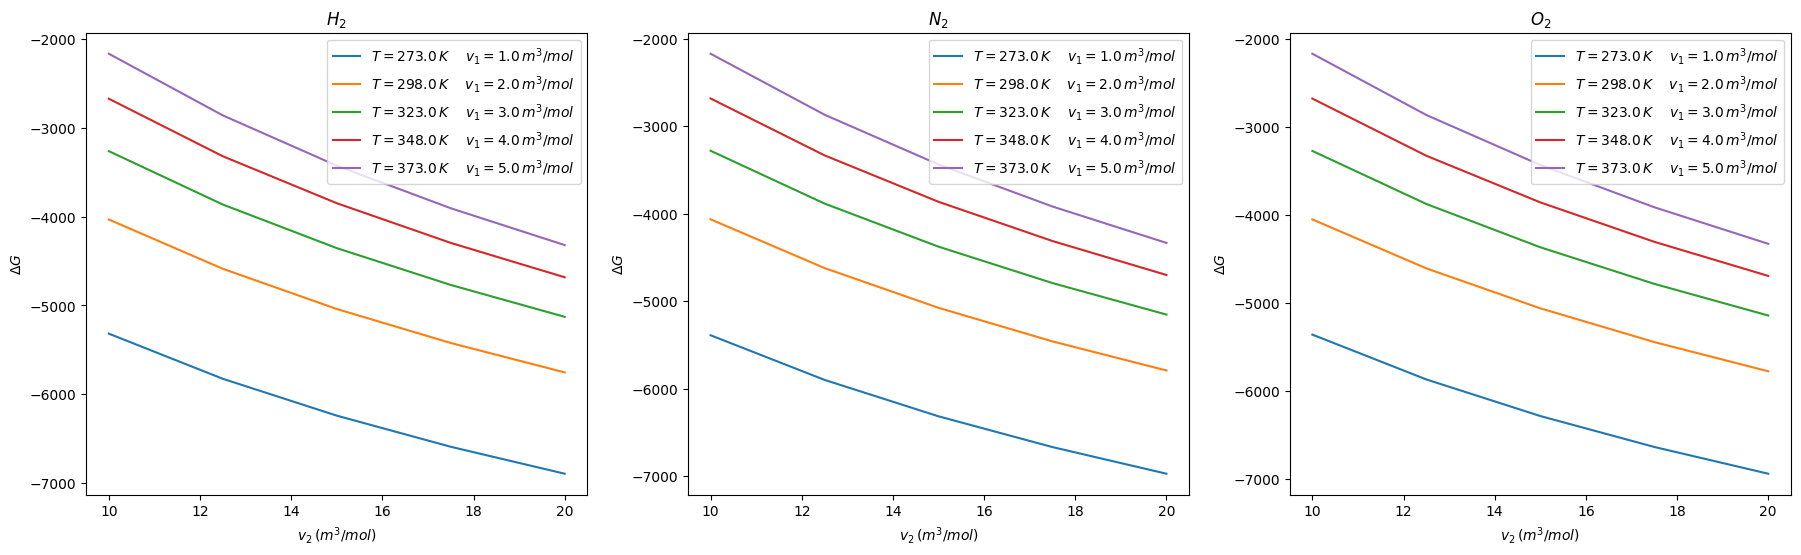

In [48]:
# @title
plt.figure(figsize = (22,6))

for i in range(3):
  plt.subplot(1,3,i+1)
  for j in range(5):
    plt.plot(v2, dG[i,j], label = f'$T={T[j]}\,K$\t$v_1={v1[j]}\,m^3/mol$')
  plt.legend(loc = 'upper right')
  plt.xlabel('$v_2\,(m^3/mol)$')
  plt.title(f'${gases[i]}$')
  plt.ylabel('$\\Delta G$')



---



#**Discusión**

Durante una expansión isotérmica de un gas de Van der Waals, en la que se fijan los valores de la temperatura $(T)$ y el volumen inicial $(V_1)$, podemos analizar cómo cambian las diferentes energías termodinámicas en función del volumen final $(V_2)$:

1. **Energía Interna, $U$**: La energía interna es una función de estado que no cambia en un gas ideal durante una expansión isotérmica a temperatura constante $(ΔU = 0)$. Sin embargo, en un gas de Van der Waals, la energía interna puede cambiar ligeramente debido a las interacciones moleculares, pero este cambio generalmente es pequeño como se observa en la gráfica.

2. **Energía Libre de Helmholtz, $A$**: La energía libre de Helmholtz está relacionada con la energía interna y la entropía mediante la ecuación $A = U - TS$. A medida que el volumen aumenta, la entropía del sistema aumentará $(ΔS > 0)$, lo que resulta en $ΔA< 0$. Esto significa que durante la expansión, el sistema ha perdido parte de su energía libre disponible para realizar trabajo mecánico o liberar energía para otros fines.

3. **Entalpía, $H$**: La entalpía se define mediante la ecuación $H = U + PV$. A medida que $V_2$ aumenta, la presión disminuirá $(ΔP < 0)$ debido a la expansión. Como resultado, $ΔH$ será negativo a medida que el gas se expanda. La disminución de la entalpía puede interpretarse como que el gas ha perdido parte de su energía interna en forma de calor al entorno, lo que ha contribuido a mantener la temperatura constante durante la expansión.

4. **Energía Libre de Gibbs, $G$**: La energía libre de Gibbs se describe a tráves de $G = H - TS$, por lo que su cambio corresponde a $ΔG = ΔH - TΔS$. Como se mencionó anteriormente, $ΔH$ y $\Delta S$ serán negativos durante la expansión isotérmica, por lo que $ΔG$ será negativa a medida que $V_2$ aumenta. Esto indica que el proceso de expansión ha llevado al sistema a un estado de menor energía libre, lo que sugiere que el sistema tiende a moverse hacia un estado más estable.